In [5]:
import pickle

#    функции сохранения и загрузки модели
def save_model(path, model):
    with open('%s.pickle' % path, 'wb') as f:
        pickle.dump(model, f)
        
def load_model(path): 
    with open('%s.pickle' % path, 'rb') as f: 
        return pickle.load(f)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score 

data = np.loadtxt('seeds_dataset.txt')


df = pd.DataFrame(data, columns = ['Area', 'Perimeter', 
            'Compactness','Length of kernel', 'Width of kernel','Asymmetry coefficient','Length of kernel groove', 'Class'])

class_names = df['Class'].astype(int)

#    удаление столбца меток класса из фрейма
df = df.drop('Class', axis=1)
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


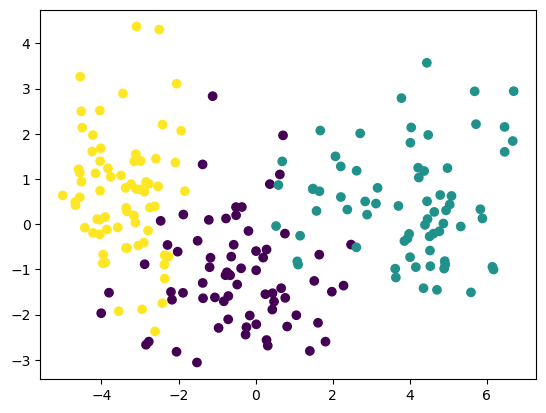

In [7]:
#    уменьшение размерности методом главных компонент
pca = PCA(n_components=2).fit(df)
df2d = pca.transform(df)

plt.scatter(df2d[:,0], df2d[:,1], c=class_names)
plt.show()

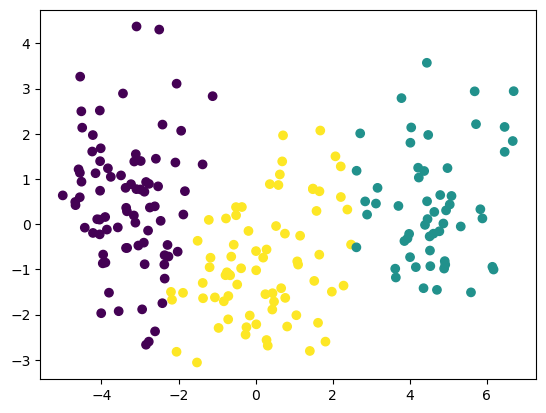

affinity =rbf; n_neighbors = 5; assign_labels = kmeans
silhouette score = 0.47194806040596987





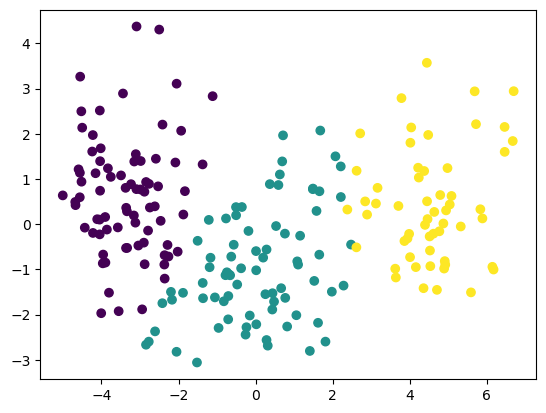

affinity =rbf; n_neighbors = 5; assign_labels = discretize
silhouette score = 0.47301351167289907





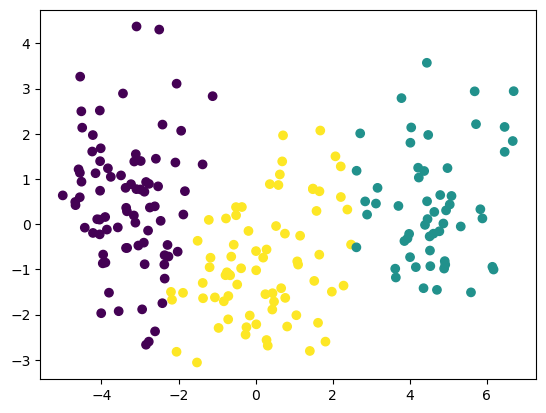

affinity =rbf; n_neighbors = 10; assign_labels = kmeans
silhouette score = 0.47194806040596987





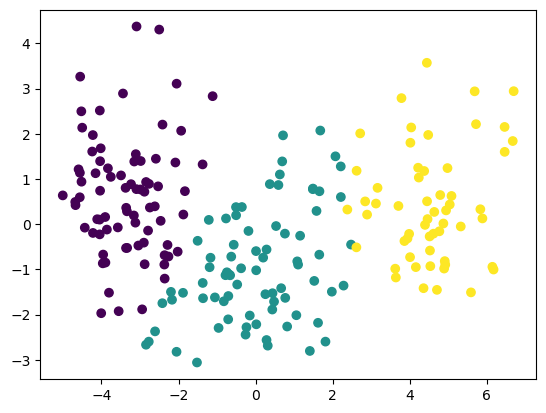

affinity =rbf; n_neighbors = 10; assign_labels = discretize
silhouette score = 0.47301351167289907





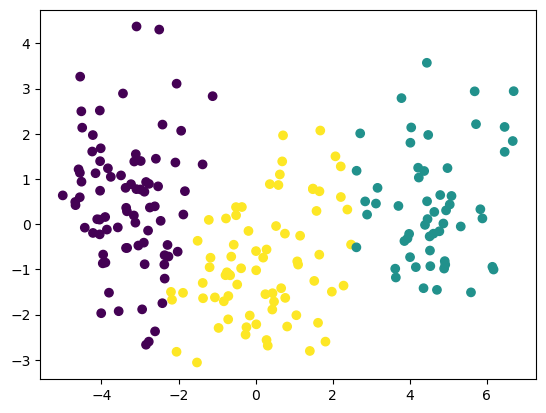

affinity =rbf; n_neighbors = 20; assign_labels = kmeans
silhouette score = 0.47194806040596987





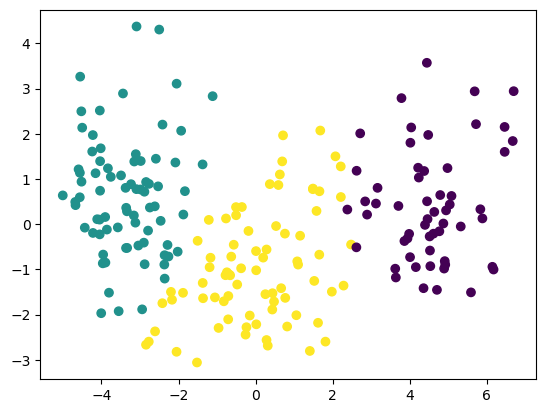

affinity =rbf; n_neighbors = 20; assign_labels = discretize
silhouette score = 0.47301351167289907





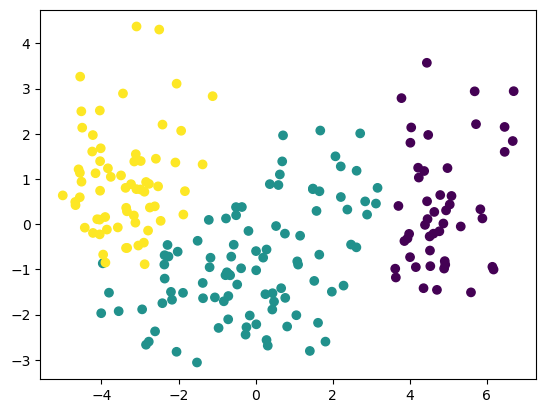

affinity =nearest_neighbors; n_neighbors = 5; assign_labels = kmeans
silhouette score = 0.42736102135432275





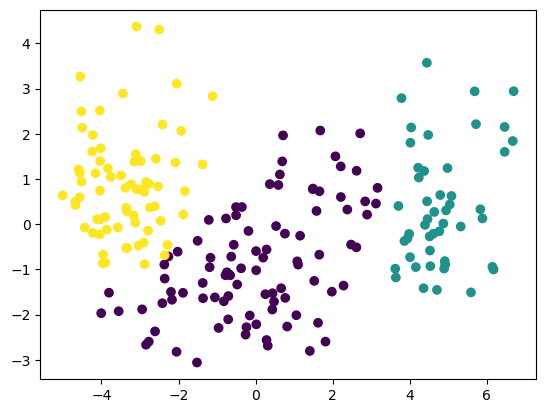

affinity =nearest_neighbors; n_neighbors = 5; assign_labels = discretize
silhouette score = 0.43598207796926763





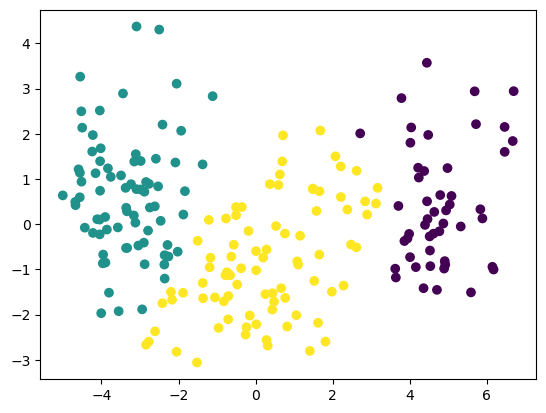

affinity =nearest_neighbors; n_neighbors = 10; assign_labels = kmeans
silhouette score = 0.4562731663898959





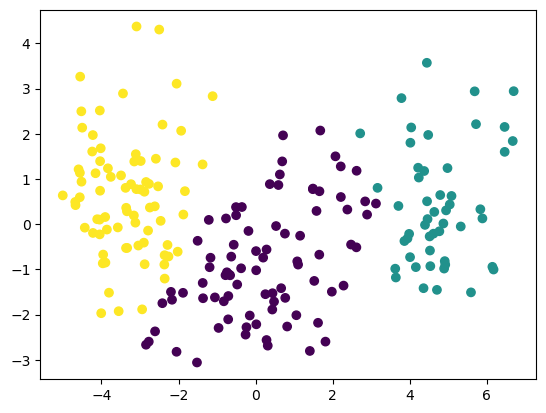

affinity =nearest_neighbors; n_neighbors = 10; assign_labels = discretize
silhouette score = 0.4599689891237299





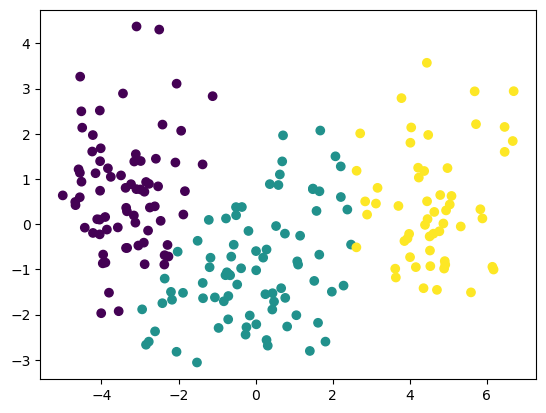

affinity =nearest_neighbors; n_neighbors = 20; assign_labels = kmeans
silhouette score = 0.46939683633550566





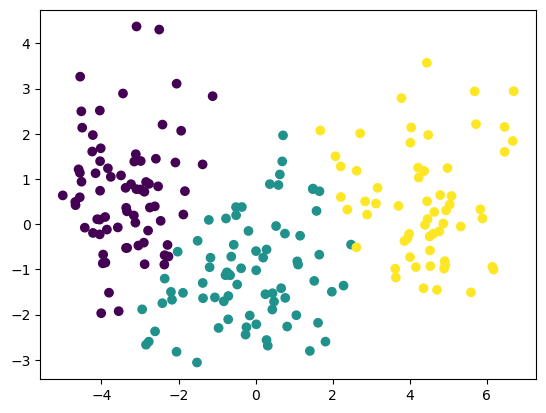

affinity =nearest_neighbors; n_neighbors = 20; assign_labels = discretize
silhouette score = 0.4774307879731447





In [8]:
from itertools import product 

alist = ['rbf', 'nearest_neighbors'] 
nblist = [5,10,20]
allist = ['kmeans', 'discretize']

#    перебор гиперпараметров
for a, nb, al in product(alist, nblist, allist):
    model = SpectralClustering(n_clusters=3, affinity=a, n_neighbors=nb,assign_labels=al)
    labels = model.fit_predict(df2d)
    
    plt.scatter(df2d[:, 0], df2d[:, 1], c=labels)
    plt.show()
    
    '''
    Метрика silhouette score (средний коэффициент силуэта всех образцов)  относится к методу интерпретации и
    проверки согласованности в кластерах данных. 
    
    Этот метод обеспечивает краткое представление того, насколько хорошо классифицирован каждый объект. 
    
    Коэффициент силуэта рассчитывается с использованием среднего внутрикластерного расстояния 
    и среднего расстояния до ближайшего кластера для каждого образца. 
    '''
    print('affinity =' +a+'; n_neighbors = '+str(nb)+'; assign_labels = '+al+'\nsilhouette score = '+ str(silhouette_score(df2d, labels))+'\n\n\n')